# Dengue Fever Prediction
-----
Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death.

Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.

In recent years dengue fever has been spreading. Historically, the disease has been most prevalent in Southeast Asia and the Pacific islands. These days many of the nearly half billion cases per year are occurring  Latin Amrica



### The Problem
Using environmental data collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce—can you predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru?

### Performance Metric
Performance is evaluated according to the mean absolute error.
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i  | .$$

## Features in the Dataset  
__City and Date indicators__:
- city : City abbreviations: sj for San Juan and iq for Iquitos
- week_start_date : Date given in yyyy-mm-dd format

__NOAA's GHCN Daily climate data weather station measurements__- station_max_temp_c : Maximum temperature
- station_min_temp_c : Minimum temperature
- station_avg_temp_c : Average temperature
- station_precip_mm : Total precipitation
- station_diur_temp_rng_c : Diurnal temperature range

__PERSIANN satellite precipitation measurements__
- precipitation_amt_mm : Total precipitation


__NOAA's NCEP Climate Forecast System Reanalysis measurements__

- reanalysis_sat_precip_amt_mm : Total precipitation
- reanalysis_dew_point_temp_k : Mean dew point temperature
- reanalysis_air_temp_k : Mean air temperature
- reanalysis_relative_humidity_percent : Mean relative humidity
- reanalysis_specific_humidity_g_per_kg : Mean specific humidity
- reanalysis_precip_amt_kg_per_m2 : Total precipitation
- reanalysis_max_air_temp_k : Maximum air temperature
- reanalysis_min_air_temp_k : Minimum air temperature
- reanalysis_avg_temp_k : Average air temperature
- reanalysis_tdtr_k : Diurnal temperature range

__Satellite vegetation__ - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index measurements
- ndvi_se : Pixel southeast of city centroid
- ndvi_sw : Pixel southwest of city centroid
- ndvi_ne : Pixel northeast of city centroid
- ndvi_nw : Pixel northwest of citcentroid


i
  angenrangeat

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter("ignore")

## Load the Data

In [68]:
df_train = pd.read_csv('C:/Users/user/1/Downloads/Dengue Fever Project/dengue_features_train.csv')
df_train_labels = pd.read_csv('C:/Users/user/1/Downloads/Dengue Fever Project/dengue_labels_train.csv')
pd.set_option('display.max_columns', None)
df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [69]:
df_train.shape

(1456, 24)

In [70]:
df_train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [71]:
df = pd.merge(df_train, df_train_labels, how='inner')
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [72]:
df.shape
print(f'Number of observations: {df.shape[0]}')
print(f'Number of attributes: {df.shape[1]}')

Number of observations: 1456
Number of attributes: 25


## Data Cleaning
----

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [74]:
# Convert week_start_date into datetime data type
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

Let's take a first look of the distribution of each numerical variable in the dataset.

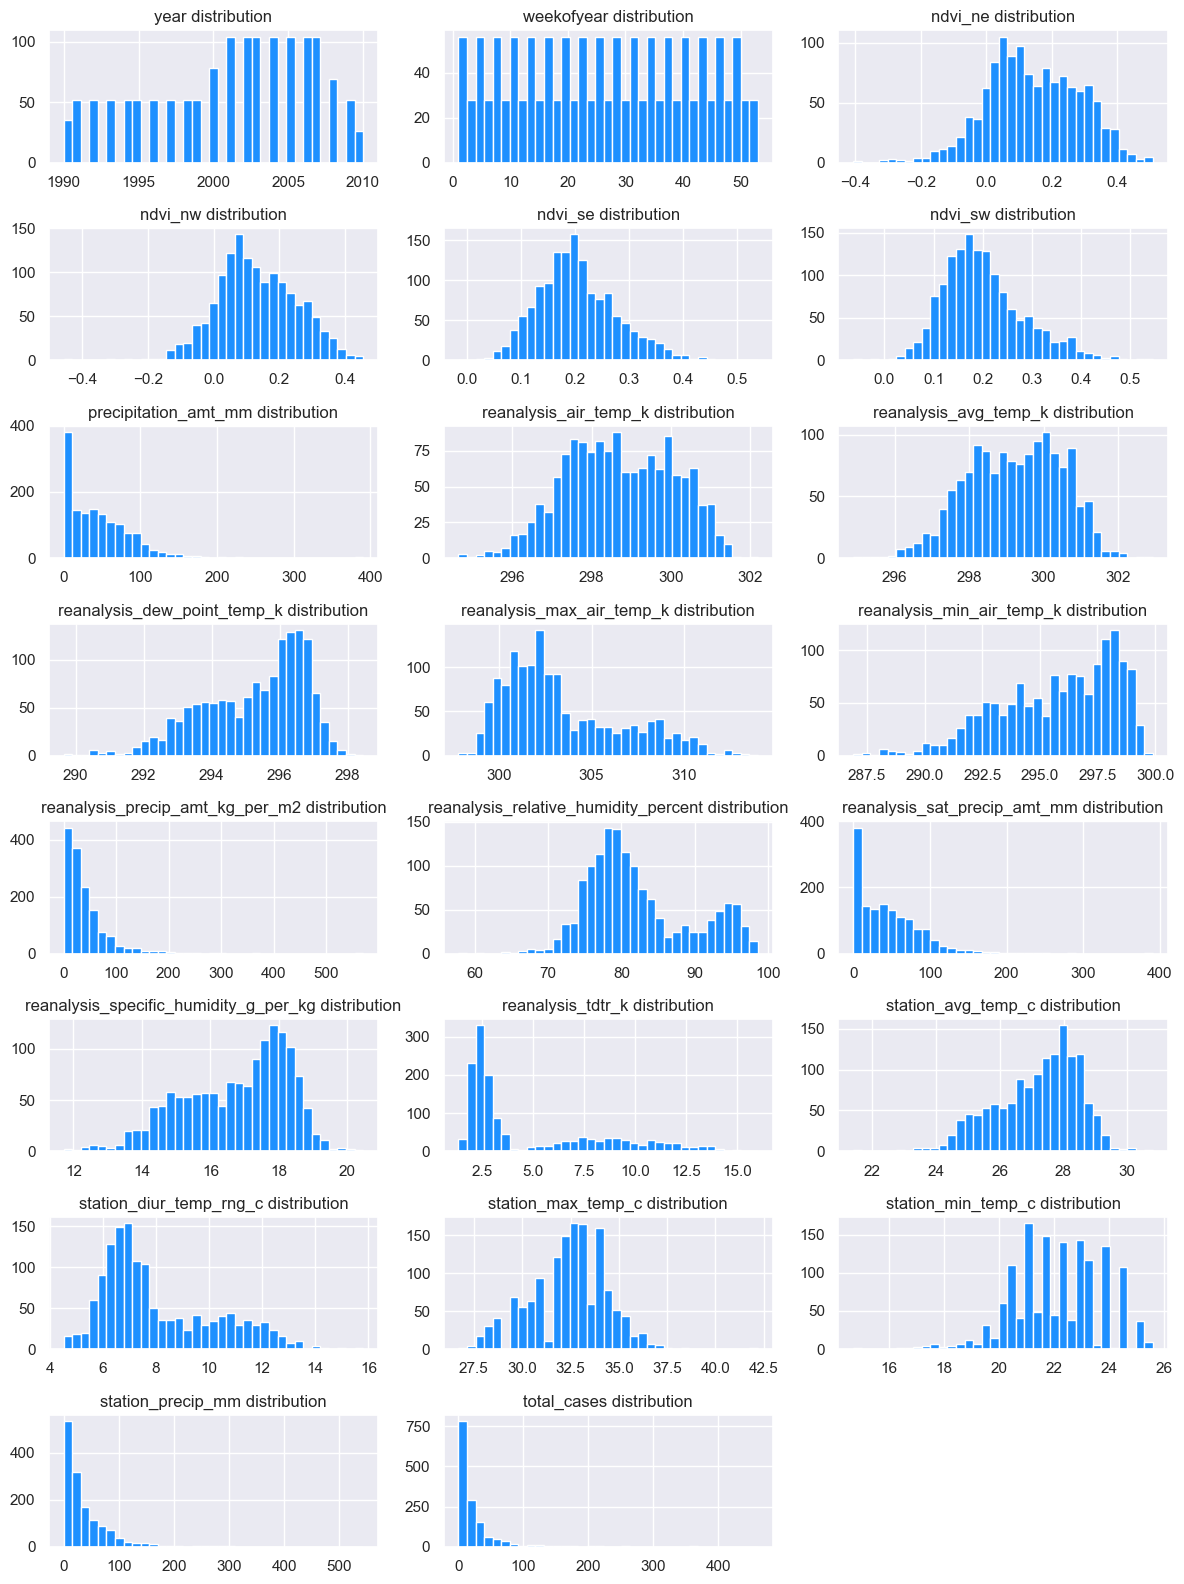

In [75]:
plt.figure(figsize=(12,16))
for i, col in enumerate(df.select_dtypes(include=['int','float']).columns, 1):
    plt.subplot(8,3,i)
    plt.hist(df[col], bins=35, color='dodgerblue')
    plt.title(f'{col} distribution')
plt.tight_layout()
plt.show()

Most predictors seem to follow the Gaussian distribution, unlike some of them like `station_precip_mm` or `reanalysis_sat_precip_mm` that suffer from extreme outliers.

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


In [77]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

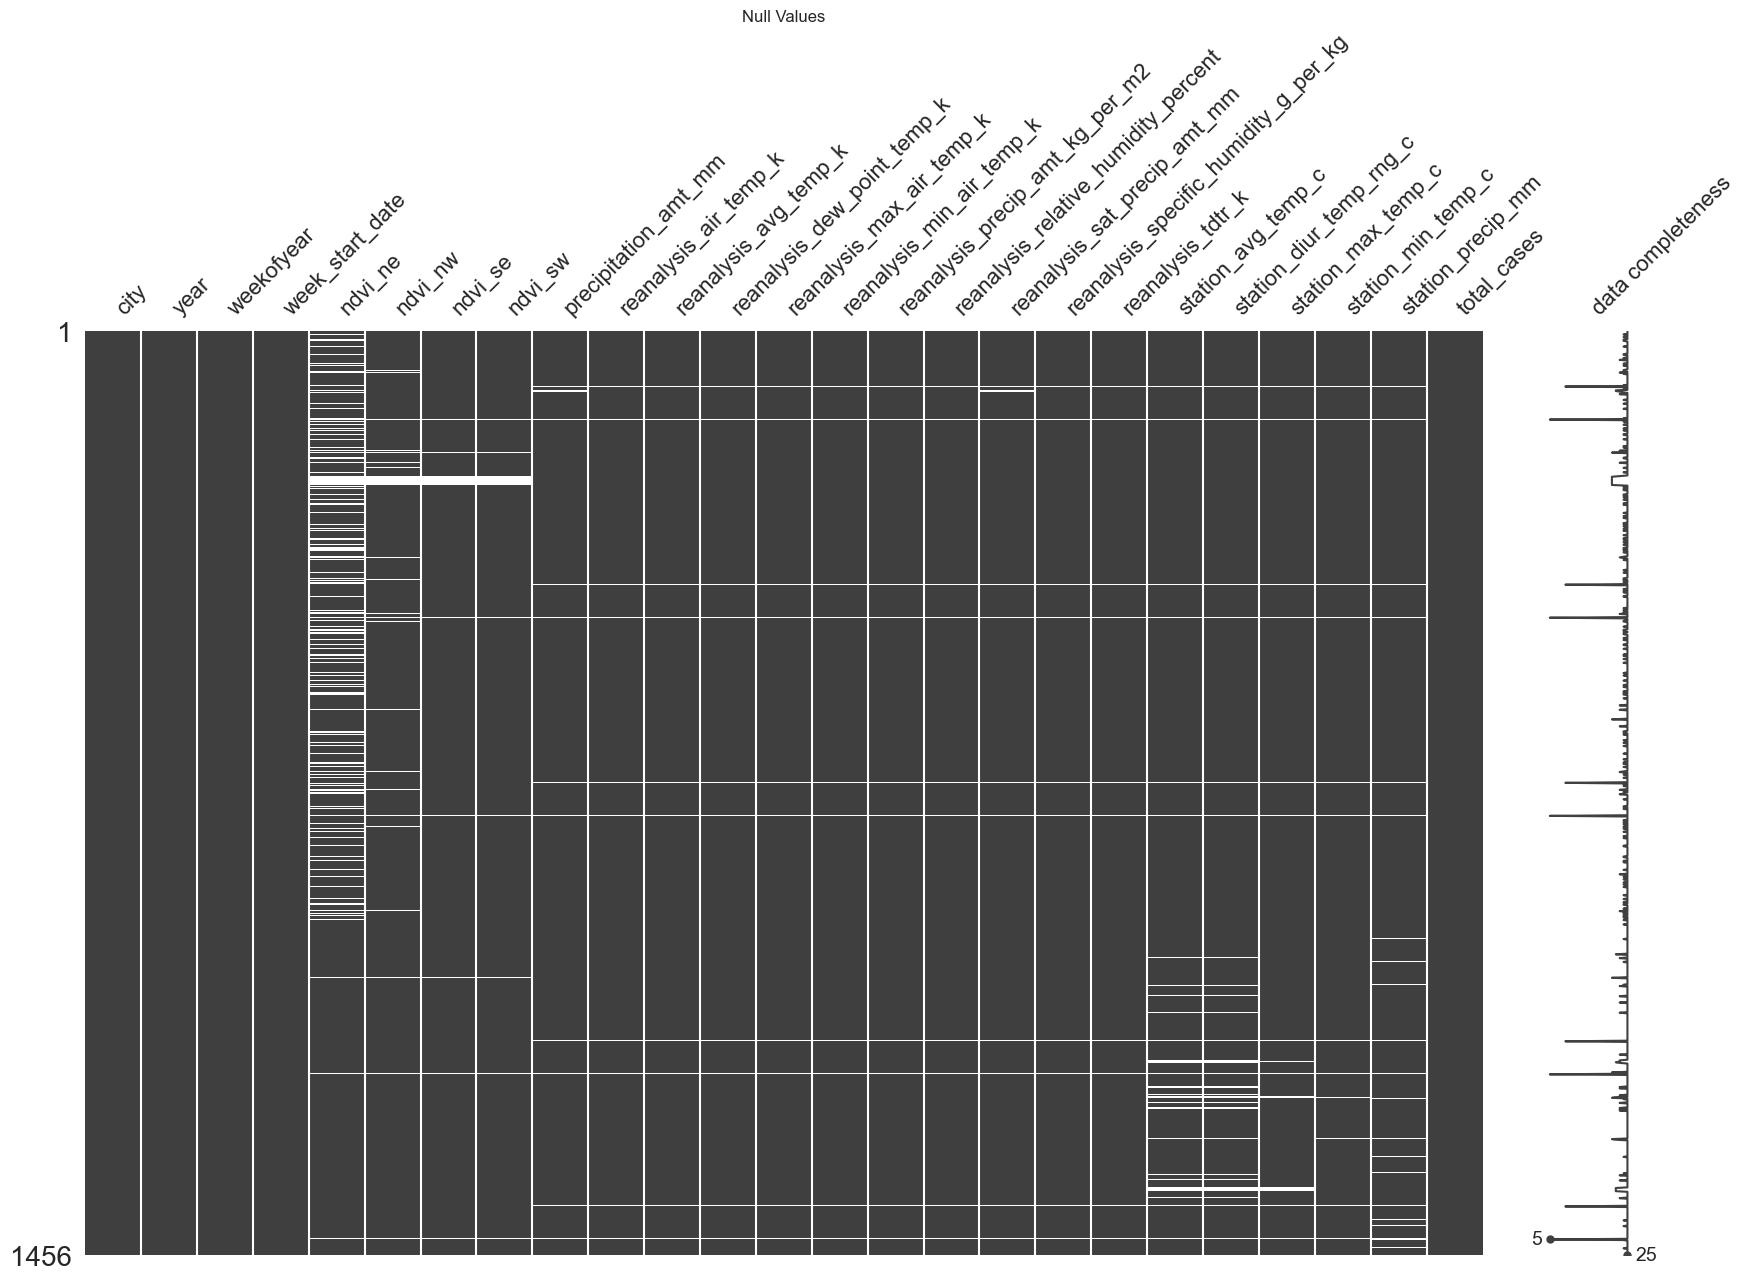

In [78]:
msno.matrix(df, labels=True, figsize=(20,12), label_rotation=45)
plt.title('Null Values')
plt.show()

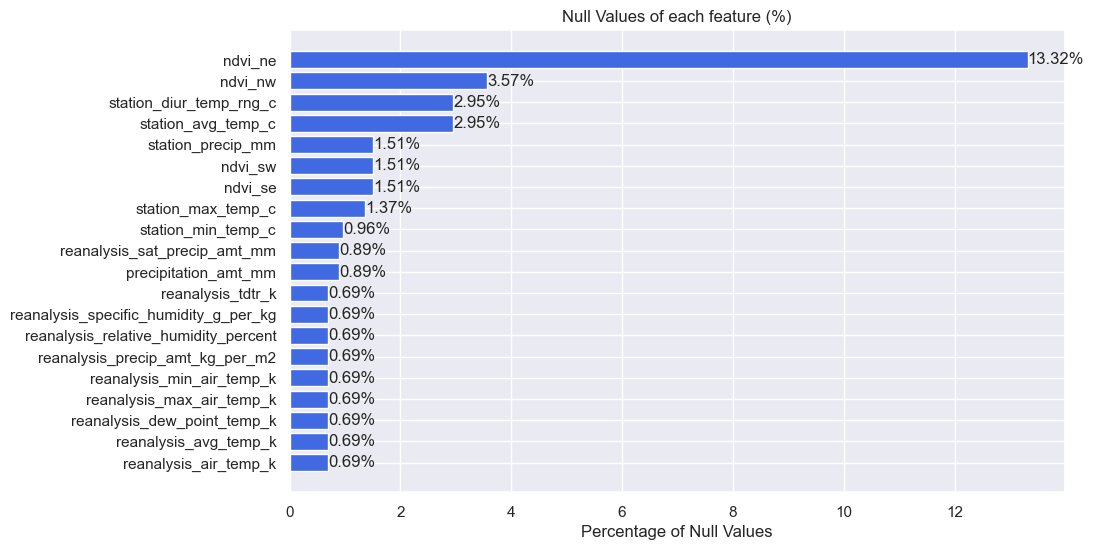

In [79]:
null_percentage = {}
for col in df.columns:
    sum_null = df[col].isnull().sum()
    sum_null_perc = 100 * sum_null / df.shape[0]
    if sum_null_perc != 0:
        null_percentage[col] = round(sum_null_perc, 2)
    else:
        continue

sorted_null_percentage = {k: v for k, v in sorted(null_percentage.items(), key=lambda item: item[1], reverse=False)}

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_null_percentage)), list(sorted_null_percentage.values()), align='center', color='royalblue')

plt.yticks(range(len(sorted_null_percentage)), list(sorted_null_percentage.keys()))
plt.xlabel('Percentage of Null Values')
plt.title('Null Values of each feature (%)')

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{list(sorted_null_percentage.values())[i]}%', va='center', ha='left')

plt.show()

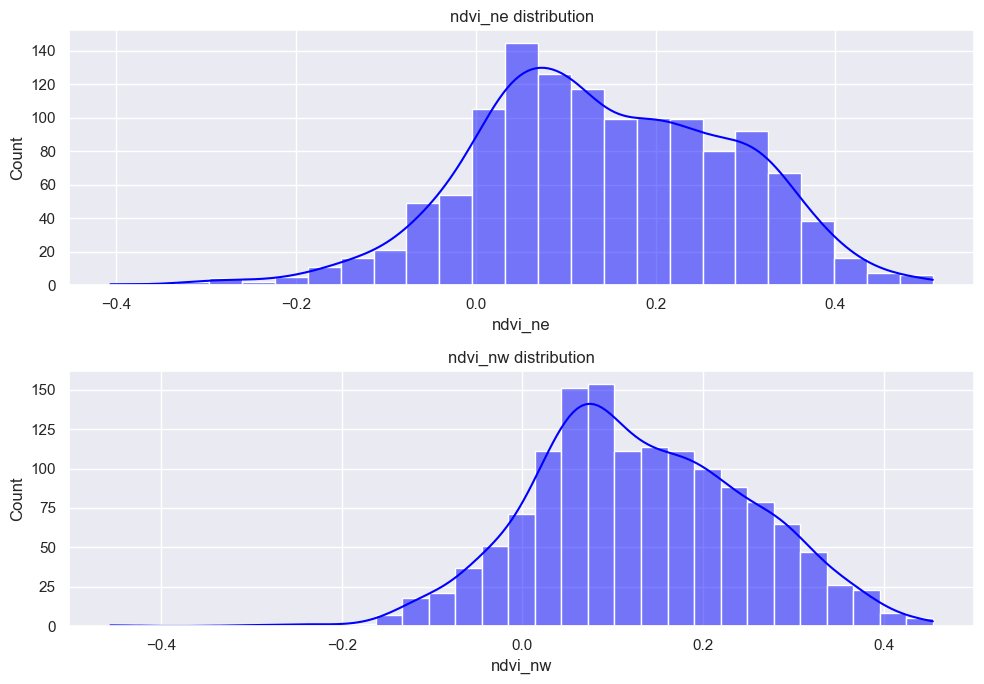

In [80]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.histplot(df['ndvi_ne'], kde=True, color = 'blue',line_kws={'color': 'black', 'lw': 1.5})
plt.title('ndvi_ne distribution')

plt.subplot(2,1,2)
sns.histplot(df['ndvi_nw'], kde=True, color = 'blue',line_kws={'color': 'black', 'lw': 1.5})
plt.title('ndvi_nw distribution')

plt.tight_layout()
plt.show()

The columns that contain the largest number of NaN values are `ndvi_ne` and `ndvi_nw`. Observing their distributions, we notice the presence of skewness with negative asymmetry. For this reason, we will choose to fill the NaN values using the median

In [81]:
# ndvi_ne
df['ndvi_ne'].fillna(df['ndvi_ne'].median(), inplace=True)
# ndvi_nw
df['ndvi_nw'].fillna(df['ndvi_nw'].median(), inplace=True)

- Since the NaN values in the rest of the columns occupy less than 5% of the data, we drop these NA values

In [82]:
df.dropna(inplace=True)

In [83]:
df.shape

(1383, 25)

## Exploratory Data Analysis
----

In [84]:
df.nunique()

city                                        2
year                                       21
weekofyear                                 52
week_start_date                          1011
ndvi_ne                                  1167
ndvi_nw                                  1317
ndvi_se                                  1347
ndvi_sw                                  1340
precipitation_amt_mm                     1110
reanalysis_air_temp_k                    1131
reanalysis_avg_temp_k                     586
reanalysis_dew_point_temp_k              1130
reanalysis_max_air_temp_k                 139
reanalysis_min_air_temp_k                 115
reanalysis_precip_amt_kg_per_m2          1007
reanalysis_relative_humidity_percent     1315
reanalysis_sat_precip_amt_mm             1110
reanalysis_specific_humidity_g_per_kg    1125
reanalysis_tdtr_k                         495
station_avg_temp_c                        488
station_diur_temp_rng_c                   468
station_max_temp_c                

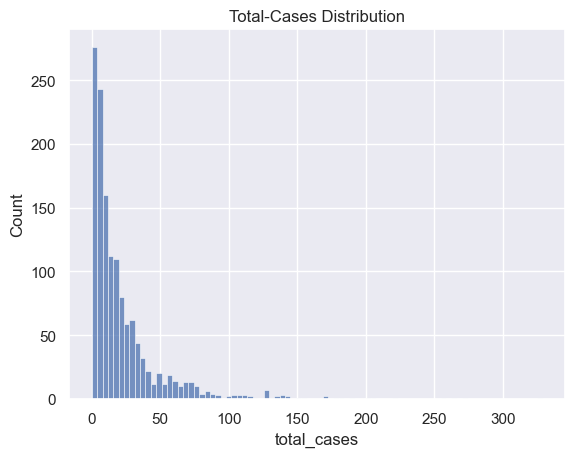

In [85]:
# Total Cases
sns.histplot(df['total_cases'])
plt.title('Total-Cases Distribution')
plt.show()

The target variable we are interested in and try to predict later, is the column `total_cases`. Observing its distribution, we observe the existence of extreme outliers.

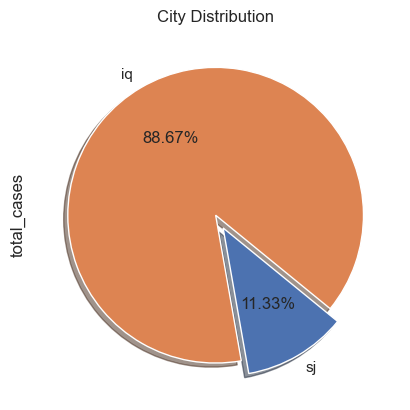


Total Cases in Iquitos: 27003
Total Cases in San Jose: 3450


In [86]:
# city
expand = [0.1, 0.00]
labels = ['sj', 'iq']
df.groupby('city')['total_cases'].sum().plot.pie(labels = labels, autopct = '%.2f%%', shadow = True, explode = expand,
                                    counterclock = True, startangle =280)
plt.title('City Distribution',)
plt.show()
print("")
print('Total Cases in Iquitos: '+ str(df.groupby('city')['total_cases'].sum()[1]))
print('Total Cases in San Jose: '+ str(df.groupby('city')['total_cases'].sum()[0]))

There are 2 different cities: 
- `sj` stands for San Juan in Puerto Rico
- `iq` stands for Iquitos in Peru

According to the data, approximately 89% of the total cases occurred in San Juan, while 11% occurred in Iquitos.
Let's explore the differences in mean and the median in the cities with the rest of the predictors.

In [87]:
df.groupby('city').agg(['mean','median']).T

city                                                                     iq  \
year                                  mean                       2004.95339   
                                      median                         2005.0   
weekofyear                            mean                        26.550847   
                                      median                           26.0   
week_start_date                       mean    2005-06-12 18:36:36.610169472   
                                      median            2005-06-04 00:00:00   
ndvi_ne                               mean                         0.264338   
                                      median                       0.265379   
ndvi_nw                               mean                          0.23826   
                                      median                       0.230942   
ndvi_se                               mean                         0.249907   
                                      median                         0.2507   
ndvi_sw                               mean                          0.26711   
                                      median                       0.262429   
precipitation_amt_mm                  mean                        65.508263   
                                      median                         61.135   
reanalysis_air_temp_k                 mean                        297.87806   
                                      median                     297.845714   
reanalysis_avg_temp_k                 mean                       299.146474   
                                      median                     299.164286   
reanalysis_dew_point_temp_k           mean                       295.552612   
                                      median                        295.895   
reanalysis_max_air_temp_k             mean                       307.099576   
                                      median                         307.05   
reanalysis_min_air_temp_k             mean                       292.908051   
                                      median                          293.1   
reanalysis_precip_amt_kg_per_m2       mean                        59.073114   
                                      median                          47.05   
reanalysis_relative_humidity_percent  mean                        88.868181   
                                      median                      91.095714   
reanalysis_sat_precip_amt_mm          mean                        65.508263   
                                      median                         61.135   
reanalysis_specific_humidity_g_per_kg mean                        17.156035   
                                      median                      17.480714   
reanalysis_tdtr_k                     mean                         9.153481   
                                      median                       8.914286   
station_avg_temp_c                    mean                        27.526357   
                                      median                           27.6   
station_diur_temp_rng_c               mean                        10.536243   
                                      median                         10.575   
station_max_temp_c                    mean                           34.025   
                                      median                           34.0   
station_min_temp_c                    mean                        21.235381   
                                      median                           21.4   
station_precip_mm                     mean                        63.747246   
                                      median                           46.1   
total_cases                           mean                         7.309322   
                                      median                            5.0   

city                                                                     sj  
year                                  mean        

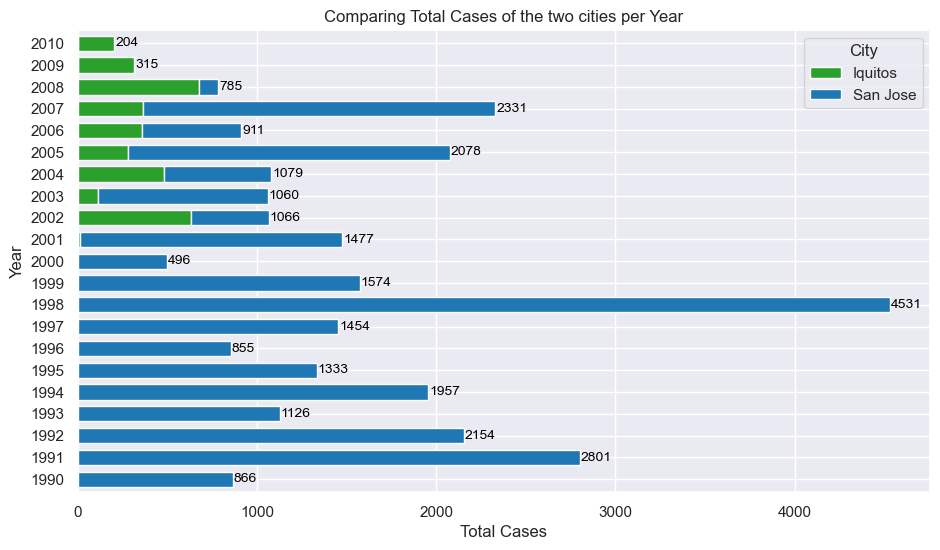

In [88]:
yearly_cases = df.groupby(["year", "city"])["total_cases"].sum().unstack()

ax = yearly_cases.plot(kind='barh', stacked=True, color=['#2ca02c','#1f77b4'], width=0.7, figsize=(11, 6))

for i, (year, total_cases) in enumerate(yearly_cases.sum(axis=1).items()):
    ax.text(total_cases + 5, i, f'{int(total_cases)}', va='center', fontsize=10, color='black', fontweight='normal')

plt.xlabel("Total Cases")
plt.ylabel("Year")
plt.title("Comparing Total Cases of the two cities per Year")
plt.legend(title="City", labels=["Iquitos", "San Jose"])

plt.show()

- We observe that the largest outbreak with the most total cases occurred in 1998, with a total of 4,531 cases. This is followed by 1991, with 2,801 cases, and then 2007, with 2,331 cases.
- The data we have from 1990 to 2000 pertains only to the city of San Jose.

Let's deep into the years with the largest outbreaks of dengue fever happened. Given that San Jose is the majority of the data and the largest outbreaks happened only there we will isolate and explore only the city of San Jose

In [89]:
sj_cases = df[df['city'] == 'sj'].groupby('year')['total_cases'].sum().sort_values(ascending=False)
sj_cases.head(3)

year
1998    4531
1991    2801
1992    2154
Name: total_cases, dtype: int64

As we see, the worst years for the city of San Jose were 1998, 1991 and 1992.

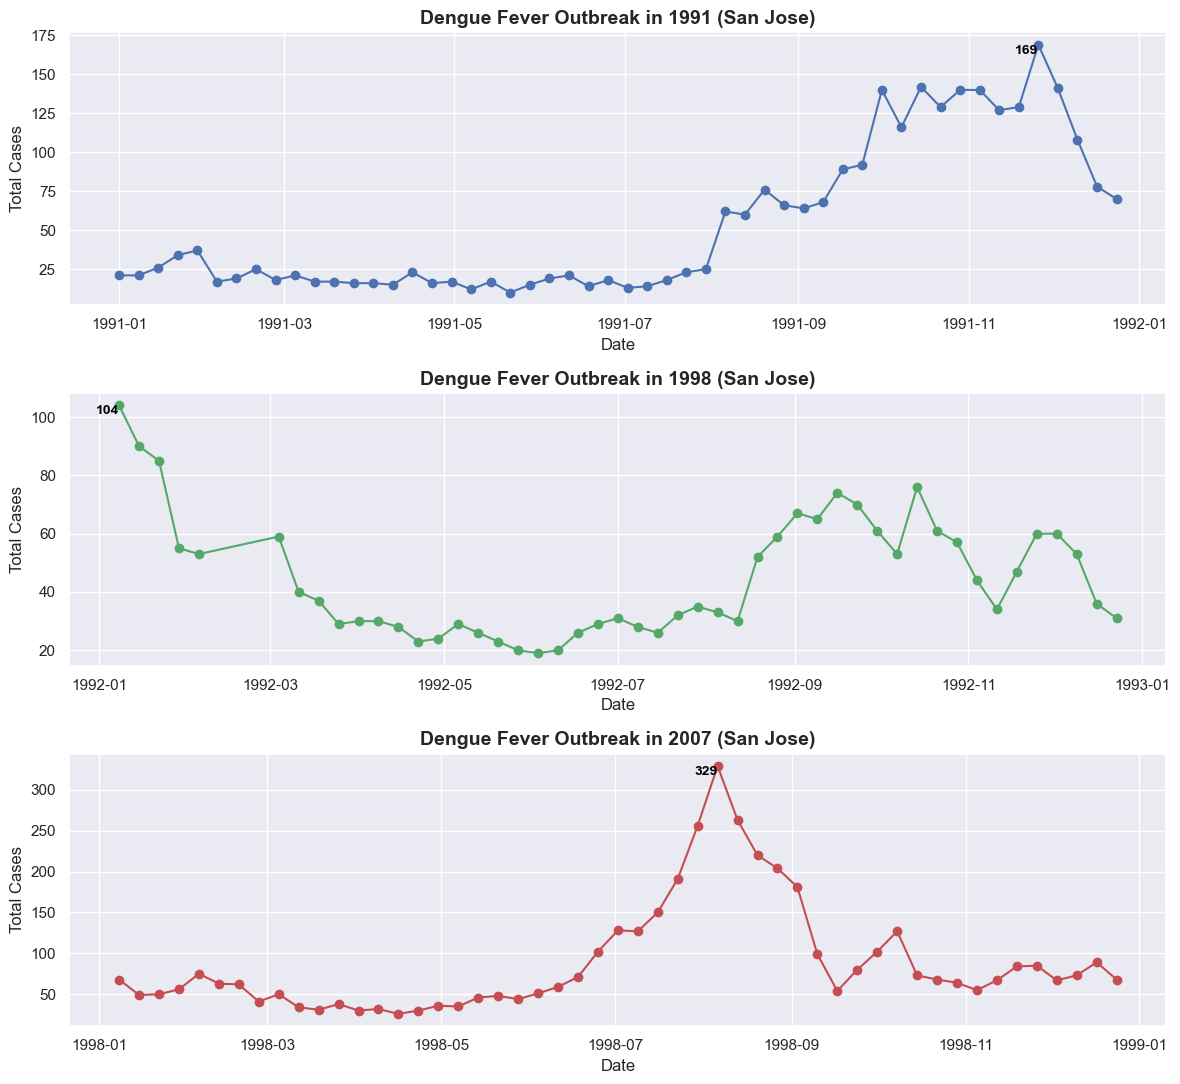

In [90]:
year_1991 = df[(df['year'] == 1991) & (df['city'] == 'sj')][['week_start_date', 'total_cases']].sort_values(by='week_start_date')
year_1998 = df[(df['year'] == 1992) & (df['city'] == 'sj')][['week_start_date', 'total_cases']].sort_values(by='week_start_date')
year_2007 = df[(df['year'] == 1998) & (df['city'] == 'sj')][['week_start_date', 'total_cases']].sort_values(by='week_start_date')

plt.figure(figsize=(12, 11))

def plot_with_max(year_data, subplot_index, title, color):
    plt.subplot(3, 1, subplot_index)
    plt.plot(year_data['week_start_date'], year_data['total_cases'], marker='o', linestyle='-', color=color)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Total Cases')

    max_cases = year_data['total_cases'].max()
    max_date = year_data.loc[year_data['total_cases'].idxmax(), 'week_start_date']

    plt.text(max_date, max_cases, f'{max_cases}', fontsize=10, color='black', ha='right', va='top', fontweight='bold')

# 1991 Plot
plot_with_max(year_1991, 1, 'Dengue Fever Outbreak in 1991 (San Jose)', 'b')

# 1998 Plot
plot_with_max(year_1998, 2, 'Dengue Fever Outbreak in 1998 (San Jose)', 'g')

# 2007 Plot
plot_with_max(year_2007, 3, 'Dengue Fever Outbreak in 2007 (San Jose)', 'r')

plt.tight_layout()
plt.show()

It's notable that each of these three outbreaks happened in a different season during its year.

In [91]:
max_total_cases = df['total_cases'].max()
max_total_cases_date = df[df['total_cases']==max_total_cases]['week_start_date']
max_total_cases_date

430   1998-08-06
Name: week_start_date, dtype: datetime64[ns]

- The date with the largest number of cases (329 people) was 1998 which was the worst year of dengue fever.

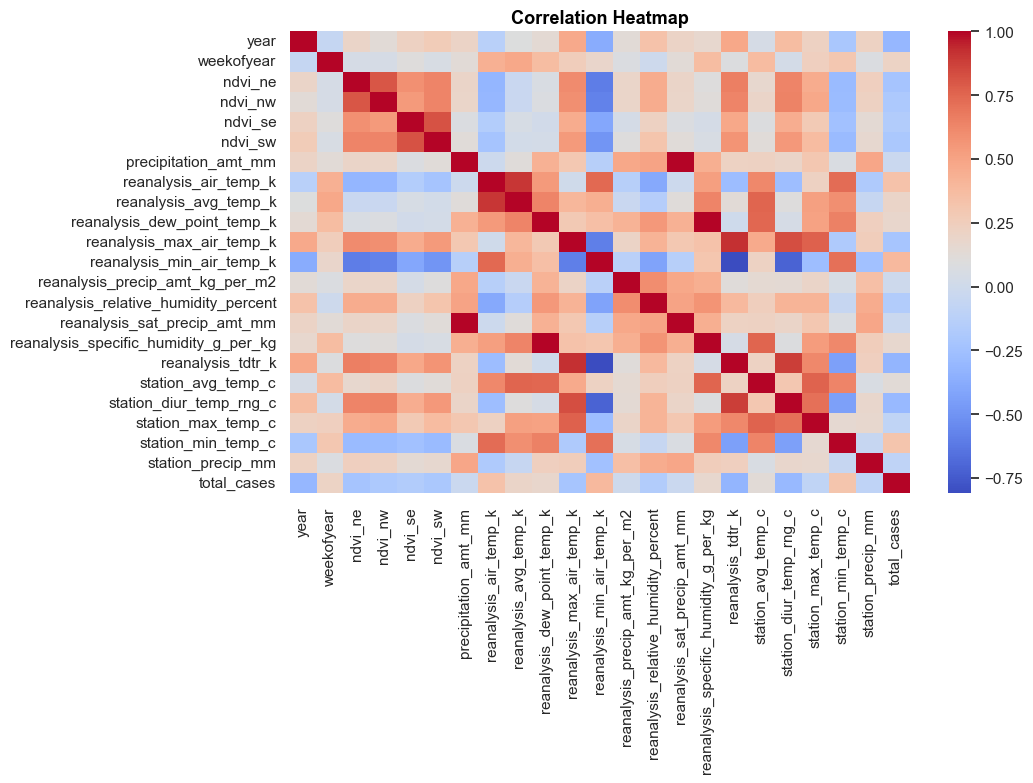

In [92]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=13, color='black', fontweight='bold')
plt.show()

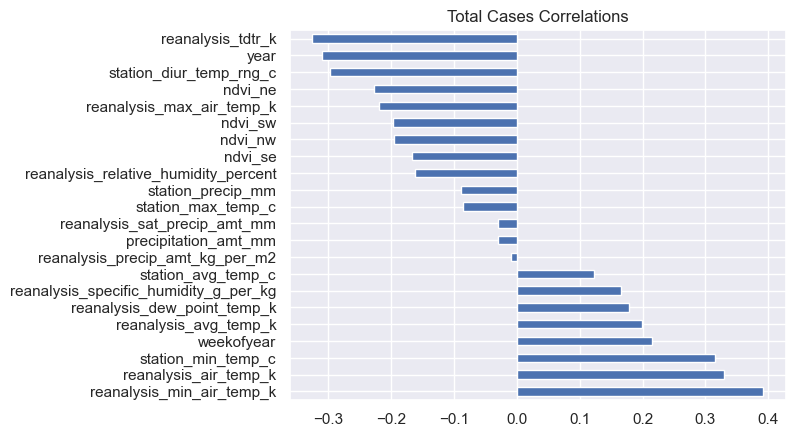

In [93]:
(df.corr().total_cases.drop('total_cases').sort_values(ascending=False).plot.barh())
plt.title('Total Cases Correlations')
plt.show()

In [94]:
numericals = [ 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

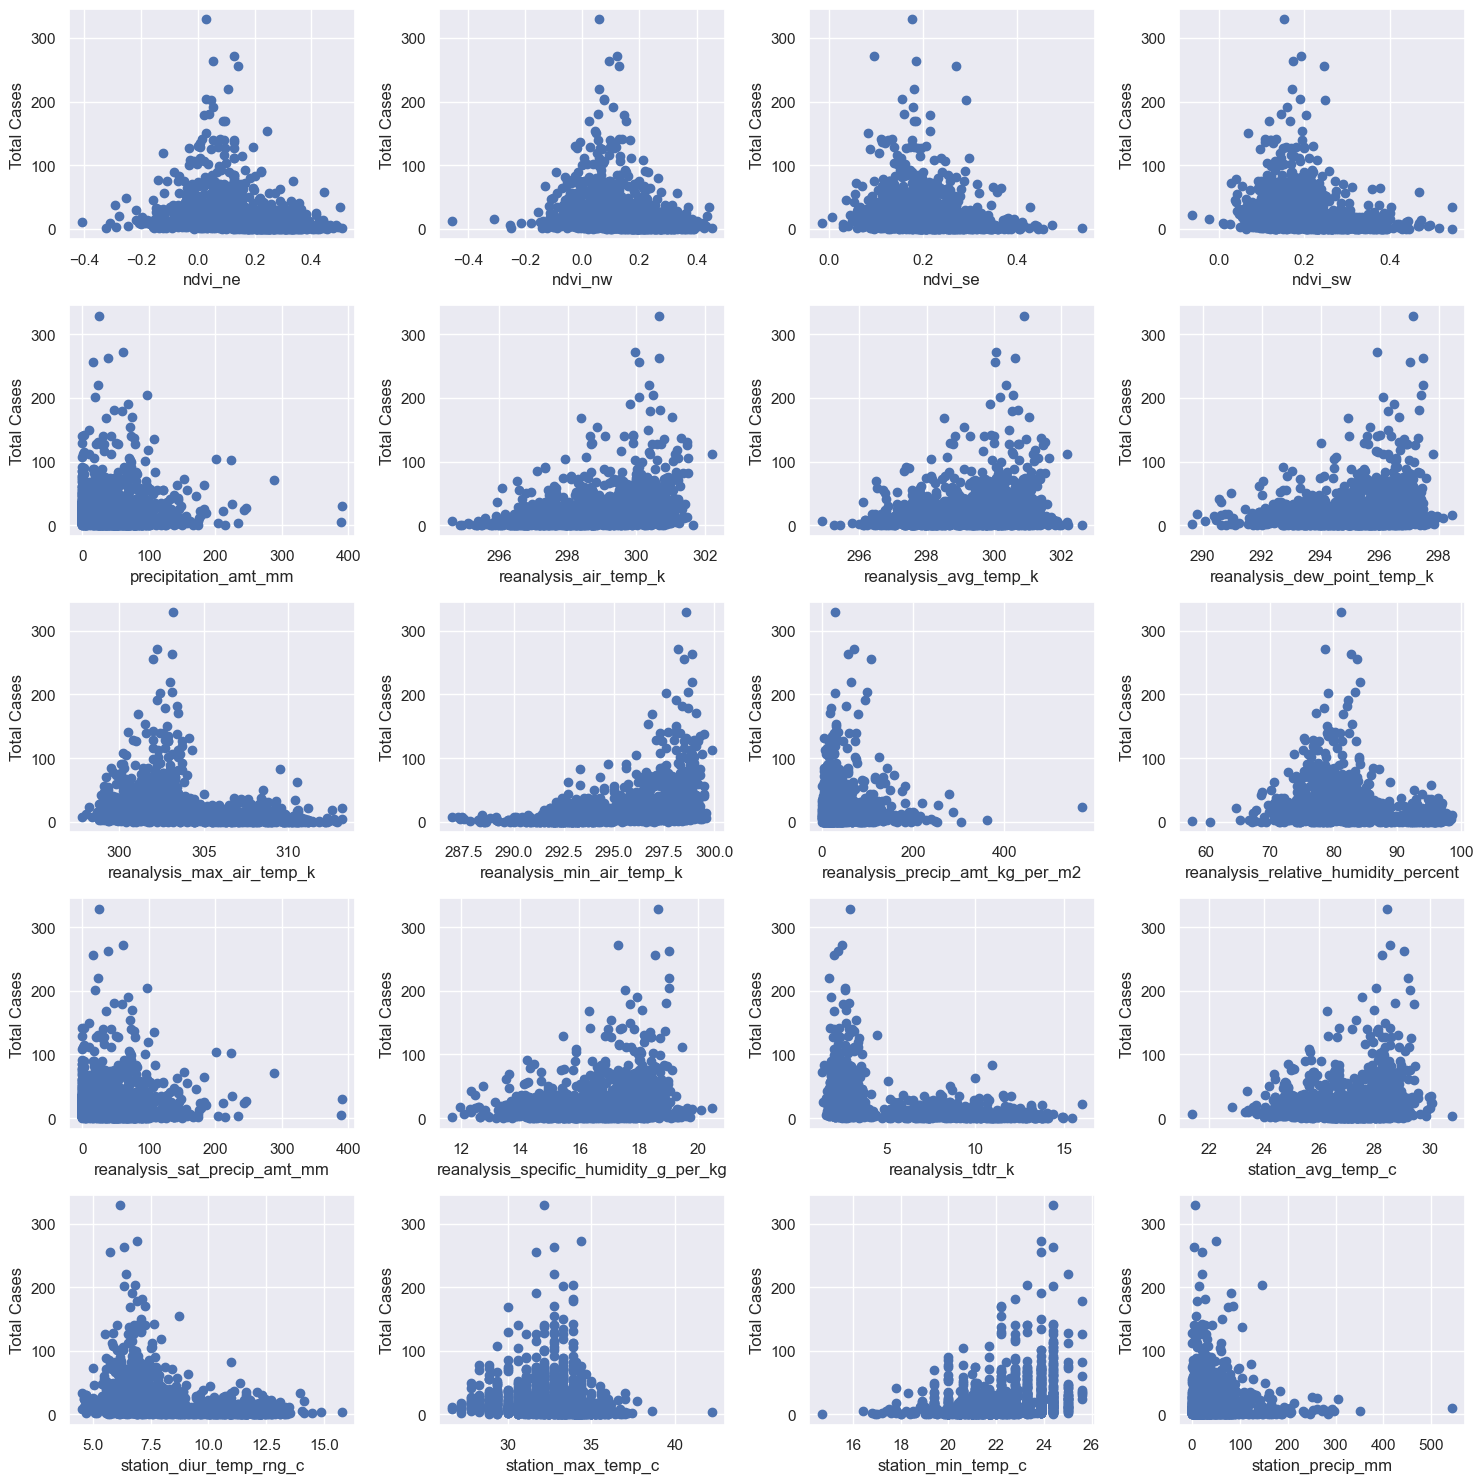

In [95]:
plt.figure(figsize=(15,15))
for i, col in enumerate(numericals, 1):
    plt.subplot(5,4,i)
    plt.scatter(df[col], df['total_cases'])
    plt.xlabel(f'{col}')
    plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

The variables `year` and `week_start_date` will not been included in our machine learning models.

### Feature Engineering

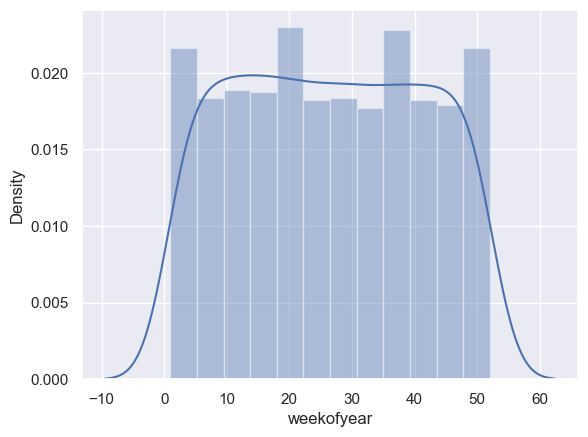

In [96]:
# weekofyear
sns.distplot(df['weekofyear'], kde=True)
plt.show()

Since weeks repeat every year, treating `weekofyear` as a cyclical variable is the best approach. This avoids misleading the model into thinking that week 53 is far from week 1 (when in reality, they are close).

**Cyclical Encoding**  
The following variables will represent the seasonal pattern in a way that respects the cyclical nature of the weeks.

<div align="center">
    $ \text{week\_sin} = \sin\left( \frac{2\pi \cdot \text{weekofyear}}{53} \right) $
</div>

<div align="center">
    $ \text{week\_cos} = \cos\left( \frac{2\pi \cdot \text{weekofyear}}{53} \right) $
</div>

The sine and cosine functions represent the x and y coordinates of points on the unit circle. By encoding cyclical features using these functions, we effectively project the feature onto this circle. This way, weeks that are numerically close but far apart in their raw values (e.g., 1 and 53) are mapped to points that are geometrically close on the circle.


In [97]:
df['week_sin'] = np.sin(2 * np.pi * df['weekofyear'] / 53)
df['week_cos'] = np.cos(2 * np.pi * df['weekofyear'] / 53)

In [98]:
df.drop('weekofyear', axis=1, inplace=True)

In [99]:
df.head()

,city,year,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,week_sin,week_cos
0,sj,1990,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.845596,-0.533823
1,sj,1990,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.776524,-0.630088
2,sj,1990,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.696551,-0.717507
3,sj,1990,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.606800,-0.794854
4,sj,1990,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.508531,-0.861044


### Dummy Variables
Predictor `city` is a binary variable, so we will create a dummy variable for it. 

In [34]:
df_dummies = pd.get_dummies(df, columns=['city'], drop_first=True)
df_dummies.head()

,year,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,week_sin,week_cos,city_sj
0,1990,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0.845596,-0.533823,1
1,1990,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0.776524,-0.630088,1
2,1990,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0.696551,-0.717507,1
3,1990,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0.606800,-0.794854,1
4,1990,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0.508531,-0.861044,1


## Linear Regression

### Without Target Transformation With Standard Scaling

In [35]:
X = df_dummies.drop(['year', 'week_start_date', 'total_cases'], axis=1)
y = df_dummies['total_cases']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

#### Standard Scaling

In [37]:
exclude_cols = ['total_cases', 'week_sin', 'week_start_date', 'week_cos', 'city']

cols_to_scale = [col for col in df.columns if col not in exclude_cols]

scaler = StandardScaler()

df_scaled = df.copy() 
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df_scaled.head()

,city,year,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,week_sin,week_cos
0,sj,-2.039831,1990-04-30,-0.111674,-0.196170,-0.052193,-0.275103,-0.759360,-0.850425,-1.186003,-1.867907,-1.106283,0.037913,-0.188460,-1.232819,-0.759360,-1.783518,-0.621627,-1.341073,-0.539680,-1.538483,-1.370109,-0.489617,4,0.845596,-0.533823
1,sj,-2.039831,1990-05-07,0.248990,0.129651,-0.546559,-0.541336,-0.522825,-0.380248,-0.629746,-0.859445,-0.763243,0.236074,-0.509903,-0.666072,-0.522825,-0.900442,-0.695775,-0.360389,-0.789309,-0.367250,0.041859,-0.644362,5,0.776524,-0.630088
2,sj,-2.039831,1990-05-14,-0.800596,0.390577,-0.617131,-0.356591,-0.256270,0.039441,-0.283505,0.113402,-0.887985,0.592765,-0.323348,-0.002844,-0.256270,0.057769,-0.716371,-0.360389,-0.735335,-0.112635,0.426941,0.041536,4,0.696551,-0.717507
3,sj,-2.039831,1990-05-21,-0.065670,1.001546,0.345665,0.425865,-0.692493,0.190908,-0.005376,0.031863,-0.607316,0.473868,-0.602267,-0.245764,-0.692493,-0.056326,-0.679298,0.223615,-0.600401,0.447520,0.747842,-0.740555,3,0.606800,-0.794854
4,sj,-2.039831,1990-05-28,0.449528,1.146732,0.669204,0.563658,-0.870804,0.582196,0.340865,0.367392,-0.451389,0.672029,-0.641132,-0.228370,-0.870804,0.292452,-0.510405,1.358564,0.627500,1.313213,1.132924,-0.702914,6,0.508531,-0.861044


#### Linear Regression Model

In [38]:
reg = LinearRegression()
lin_reg = reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
training_mae = mean_absolute_error(y_train, y_pred_train)

y_pred = lin_reg.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Training MAE: {training_mae:.3f}')
print(f'Test MAE: {test_mae:.3f}')

Training MAE: 15.511
Test MAE: 15.540


In [39]:
print(f'Coefficients : {lin_reg.coef_}')
print("")
print(f'Intercept: {lin_reg.intercept_}')

Coefficients : [-1.18757958e+01  2.41171751e+01 -2.02368772e+01 -3.16738030e+00
 -6.75525195e-03  8.96229499e+00 -3.52017377e+00 -2.31977994e+01
 -8.46442480e-02 -7.94271236e-01 -6.19438995e-03  2.04898002e+00
 -6.75525195e-03  1.70460802e+01 -3.74037732e-02  2.83459244e+00
 -7.37444593e-01  8.03025299e-01  5.70815121e-01 -4.99426094e-03
 -1.22763755e+01  7.23839428e+00  3.37692637e+01]

Intercept: 4926.718992159008


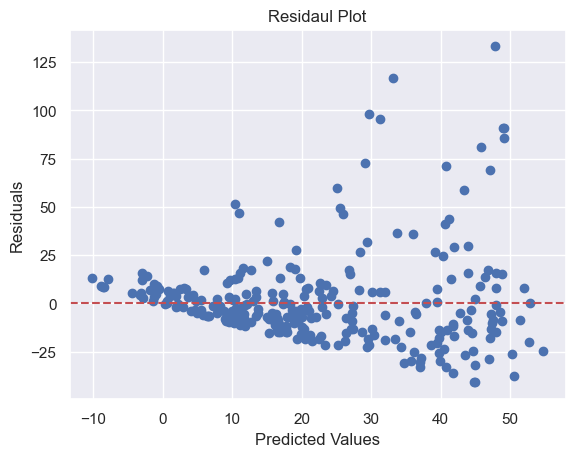

In [40]:
residuals = y_test - y_pred

plt.scatter(x=y_pred, y=residuals)
plt.axhline(y=0, color = 'r', linestyle='--')
plt.title('Residaul Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [41]:
vif_data = pd.DataFrame()
vif_data["total_target"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [42]:
vif_data.sort_values(by='VIF', ascending=False)

,total_target,VIF
4,precipitation_amt_mm,inf
12,reanalysis_sat_precip_amt_mm,inf
7,reanalysis_dew_point_temp_k,2.164692e+07
5,reanalysis_air_temp_k,2.041046e+07
6,reanalysis_avg_temp_k,4.145265e+06
9,reanalysis_min_air_temp_k,3.614683e+05
8,reanalysis_max_air_temp_k,2.139437e+05
11,reanalysis_relative_humidity_percent,7.405840e+04
15,station_avg_temp_c,5.104863e+03
17,station_max_temp_c,2.041053e+03


In [43]:
X = df_dummies.drop(['year', 'week_start_date', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'total_cases', 'precipitation_amt_mm', 'reanalysis_max_air_temp_k', 'reanalysis_tdtr_k', 'reanalysis_air_temp_k', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k'], axis=1)
y = df_dummies['total_cases']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

In [45]:
reg = LinearRegression()
lin_reg = reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
training_mae = mean_absolute_error(y_train, y_pred_train)

y_pred = lin_reg.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)

print(f'Training MAE: {training_mae:.3f}')
print(f'Test MAE: {test_mae:.3f}')

Training MAE: 15.659
Test MAE: 15.644


In [46]:
vif_data = pd.DataFrame()
vif_data["total_target"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [47]:
vif_data.sort_values(by='VIF', ascending=False)

,total_target,VIF
5,reanalysis_min_air_temp_k,194332.008853
4,reanalysis_avg_temp_k,177049.426927
9,station_max_temp_c,772.437899
7,reanalysis_relative_humidity_percent,710.170522
10,station_min_temp_c,517.909188
14,city_sj,53.965423
2,ndvi_se,28.272937
3,ndvi_sw,26.156810
0,ndvi_ne,7.328690
1,ndvi_nw,7.278481


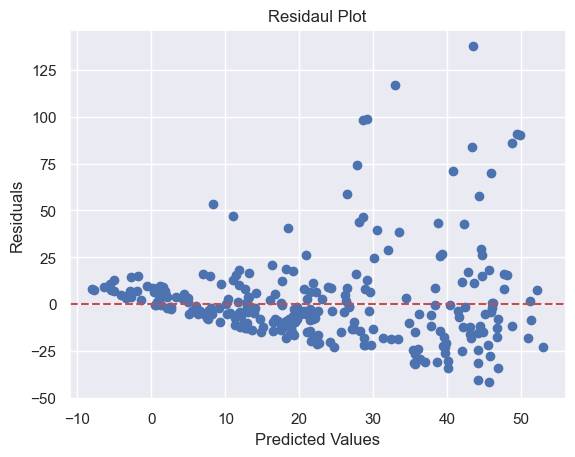

In [48]:
residuals = y_test - y_pred

plt.scatter(x=y_pred, y=residuals)
plt.axhline(y=0, color = 'r', linestyle='--')
plt.title('Residaul Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [49]:
lin_reg_mae = round(test_mae, 2)
lin_reg_mae

15.64

## Machine Learning

### With Target Transformation

In [35]:
df_dummies['total_cases'] = df_dummies['total_cases'].apply(lambda x: np.log1p(x))

### Without Target Transformation

In [36]:
X = df_dummies.drop(['year', 'week_start_date', 'total_cases'], axis=1)
y = df_dummies['total_cases']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

### Random Forests

In [38]:
rf = RandomForestRegressor(random_state=42)
model2 = rf.fit(X_train, y_train)
y_train_pred = model2.predict(X_train)
training_mae = mean_absolute_error(y_train, y_train_pred)
print(f'Training MAE: {training_mae:.3f}')
y_pred = model2.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {test_mae:.3f}')

Training MAE: 0.260
Test MAE: 0.679


In [39]:
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=300)

param_grid = {
    'min_samples_leaf':[1, 2, 3],
    'min_samples_split':[1, 2, 3],
    'criterion':['squared_error', 'absolute_error']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters that minimizes MAE:", best_params)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) on test set: {rf_mae}")


results_df = pd.DataFrame(grid_search.cv_results_)

results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].round(2).sort_values(by='rank_test_score')

Best parameters that minimizes MAE: {'criterion': 'absolute_error', 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Absolute Error (MAE) on test set: 0.6864672866306537


,params,mean_test_score,std_test_score,rank_test_score
14,"{'criterion': 'absolute_error', 'min_samples_l...",-0.68,0.02,1
13,"{'criterion': 'absolute_error', 'min_samples_l...",-0.68,0.02,1
17,"{'criterion': 'absolute_error', 'min_samples_l...",-0.68,0.02,3
16,"{'criterion': 'absolute_error', 'min_samples_l...",-0.68,0.02,3
11,"{'criterion': 'absolute_error', 'min_samples_l...",-0.69,0.02,5
10,"{'criterion': 'absolute_error', 'min_samples_l...",-0.69,0.02,6
1,"{'criterion': 'squared_error', 'min_samples_le...",-0.69,0.02,7
2,"{'criterion': 'squared_error', 'min_samples_le...",-0.69,0.02,8
8,"{'criterion': 'squared_error', 'min_samples_le...",-0.69,0.02,9
7,"{'criterion': 'squared_error', 'min_samples_le...",-0.69,0.02,9


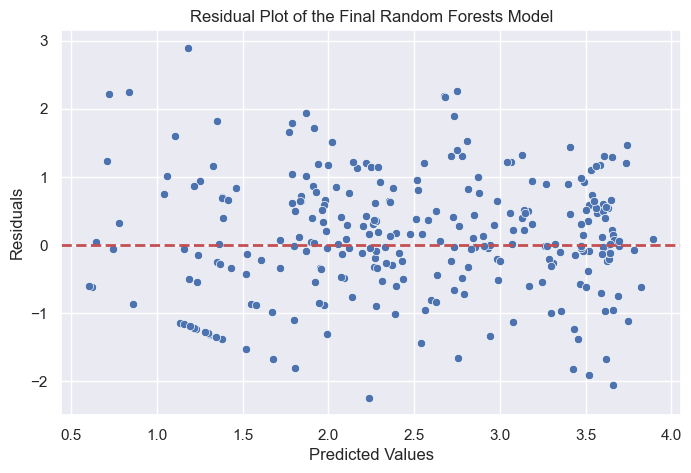

In [40]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) 
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot of the Final Random Forests Model")
plt.show()

### Gradient Boosting

In [41]:
loss_functions = ['absolute_error', 'huber', 'quantile']

for i in loss_functions:
    print(i)
    grad = GradientBoostingRegressor(loss = i)
                                    
    grad_fit = grad.fit(X_train, y_train)
    
    # Training MAE
    y_pred_train = grad_fit.predict(X_train)
    training_mae = mean_absolute_error(y_train, y_pred_train)
    print(f'Training MAE: {training_mae:.3f}')
    
    # Test MAE
    y_pred = grad_fit.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred)
    print(f'Test MAE: {test_mae:.3f}')
    print("")

absolute_error
Training MAE: 0.562
Test MAE: 0.698

huber
Training MAE: 0.517
Test MAE: 0.676

quantile
Training MAE: 1.098
Test MAE: 1.067



In [43]:
grad = GradientBoostingRegressor(loss='absolute_error', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=grad, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters that minimizes MAE:", best_params)

best_grad_model = grid_search.best_estimator_
print("")


y_pred = best_grad_model.predict(X_test)
grad_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) on test set: {grad_mae}")
print("")

results_df = pd.DataFrame(grid_search.cv_results_)
results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].round(2).sort_values(by='rank_test_score')

Best parameters that minimizes MAE: {'max_depth': 3, 'n_estimators': 100}

Mean Absolute Error (MAE) on test set: 0.6963084173753598



,params,mean_test_score,std_test_score,rank_test_score
0,"{'max_depth': 3, 'n_estimators': 100}",-0.70,0.02,1
3,"{'max_depth': 4, 'n_estimators': 100}",-0.70,0.02,2
1,"{'max_depth': 3, 'n_estimators': 200}",-0.70,0.03,3
4,"{'max_depth': 4, 'n_estimators': 200}",-0.70,0.02,4
5,"{'max_depth': 4, 'n_estimators': 300}",-0.70,0.03,5
2,"{'max_depth': 3, 'n_estimators': 300}",-0.71,0.03,6
6,"{'max_depth': 5, 'n_estimators': 100}",-0.71,0.03,7
8,"{'max_depth': 5, 'n_estimators': 300}",-0.71,0.03,8
7,"{'max_depth': 5, 'n_estimators': 200}",-0.71,0.03,9


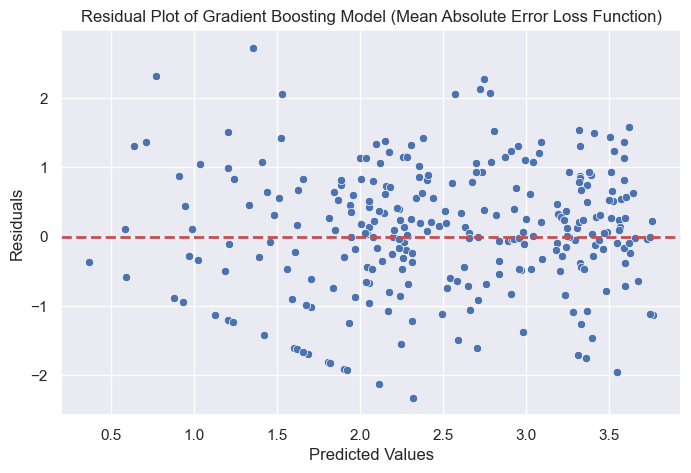

In [44]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) 
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot of Gradient Boosting Model (Mean Absolute Error Loss Function)")
plt.show()

In [45]:
grad = GradientBoostingRegressor(loss='huber', random_state=42)

param_grid = {
    'n_estimators': [100, 400],
    'max_depth': [3, None],
    'alpha':[0.3, 0.5, 0.7]
}

grid_search = GridSearchCV(estimator=grad, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters that minimizes MAE:", best_params)

best_grad_huber_model = grid_search.best_estimator_
print("")


y_pred = best_grad_huber_model.predict(X_test)
grad_huber_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) on test set: {grad_huber_mae}")
print("")

results_df = pd.DataFrame(grid_search.cv_results_)
results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].round(2).sort_values(by='rank_test_score')

Best parameters that minimizes MAE: {'alpha': 0.5, 'max_depth': 3, 'n_estimators': 100}

Mean Absolute Error (MAE) on test set: 0.6957265215817192



,params,mean_test_score,std_test_score,rank_test_score
4,"{'alpha': 0.5, 'max_depth': 3, 'n_estimators':...",-0.70,0.03,1
0,"{'alpha': 0.3, 'max_depth': 3, 'n_estimators':...",-0.71,0.03,2
8,"{'alpha': 0.7, 'max_depth': 3, 'n_estimators':...",-0.71,0.02,3
5,"{'alpha': 0.5, 'max_depth': 3, 'n_estimators':...",-0.71,0.04,4
1,"{'alpha': 0.3, 'max_depth': 3, 'n_estimators':...",-0.71,0.03,5
9,"{'alpha': 0.7, 'max_depth': 3, 'n_estimators':...",-0.72,0.03,6
2,"{'alpha': 0.3, 'max_depth': None, 'n_estimator...",-0.74,0.03,7
3,"{'alpha': 0.3, 'max_depth': None, 'n_estimator...",-0.74,0.03,8
7,"{'alpha': 0.5, 'max_depth': None, 'n_estimator...",-0.76,0.02,9
6,"{'alpha': 0.5, 'max_depth': None, 'n_estimator...",-0.76,0.02,10


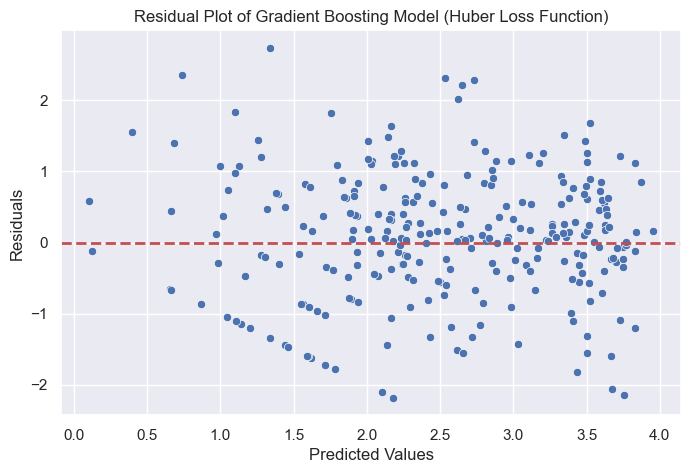

In [46]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) 
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot of Gradient Boosting Model (Huber Loss Function)")
plt.show()

### XGBoost

In [47]:

loss_functions = ['reg:absoluteerror', 'reg:pseudohubererror', 'reg:pseudohubererror', 'reg:tweedie']
for i in loss_functions:
    import xgboost as xgb
    print(i)
    xgb = xgb.XGBRegressor(objective=i)
    xgb_model = xgb.fit(X_train, y_train)
    
    # Training MAE
    y_pred_train = xgb_model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    print(f'Training MAE: {train_mae:.3f}')
    
    # Test MAE
    y_pred = xgb_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Test MAE: {mae:.3f}')
    print("")

reg:absoluteerror
Training MAE: 0.221
Test MAE: 0.701

reg:pseudohubererror
Training MAE: 0.504
Test MAE: 1.619

reg:pseudohubererror
Training MAE: 0.504
Test MAE: 1.619

reg:tweedie
Training MAE: 0.085
Test MAE: 0.758



#### Absolute Error Loss Function

In [48]:
import xgboost as xgb

xgb =  xgb.XGBRegressor(objective="reg:absoluteerror")

param_grid = {'n_estimators':[100, 200, 300],
              "max_depth": [None, 3, 5, 7],
              'learning_rate':[0.01, 0.25]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters that minimizes MAE:", best_params)

best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {xgb_mae}")

results_df = pd.DataFrame(grid_search.cv_results_)
results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].round(2).sort_values(by='rank_test_score')

Best parameters that minimizes MAE: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}
Test MAE: 0.7061781381480136


,params,mean_test_score,std_test_score,rank_test_score
11,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",-0.70,0.02,1
2,"{'learning_rate': 0.01, 'max_depth': None, 'n_...",-0.70,0.03,2
8,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",-0.70,0.02,3
5,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-0.70,0.02,4
10,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",-0.71,0.02,5
1,"{'learning_rate': 0.01, 'max_depth': None, 'n_...",-0.71,0.02,6
7,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",-0.71,0.02,7
15,"{'learning_rate': 0.25, 'max_depth': 3, 'n_est...",-0.71,0.02,8
4,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-0.71,0.02,9
16,"{'learning_rate': 0.25, 'max_depth': 3, 'n_est...",-0.72,0.02,10


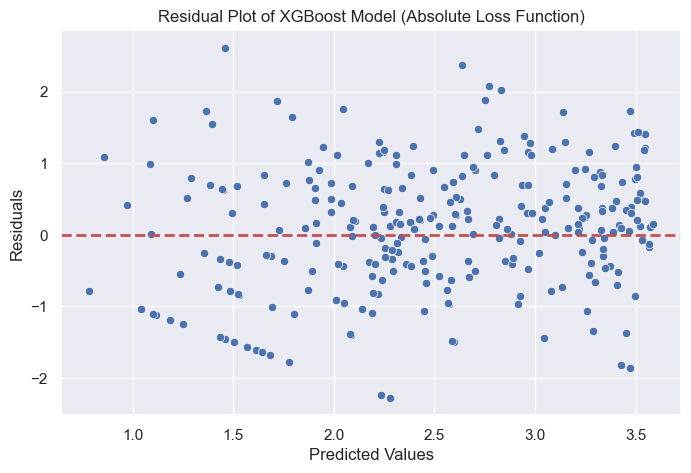

In [49]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) 
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot of XGBoost Model (Absolute Loss Function)")
plt.show()

#### Pseudo-Hub Error Loss Function

In [50]:
import xgboost as xgb

xgb =  xgb.XGBRegressor(objective="reg:pseudohubererror")

param_grid = {'huber_slope':[0.4, 0.5, 0.6, 0.7],
              "max_depth": [None, 3, 5, 7],
              'n_estimators':[100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters that minimizes MAE:", best_params)

best_xgb_pseudo_model = grid_search.best_estimator_

y_pred = best_xgb_pseudo_model.predict(X_test)

xgb_pseudo_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {xgb_pseudo_mae}")

results_df = pd.DataFrame(grid_search.cv_results_)
results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].round(2).sort_values(by='rank_test_score')

Best parameters that minimizes MAE: {'huber_slope': 0.4, 'max_depth': 5, 'n_estimators': 300}
Test MAE: 2.1344492764782674


,params,mean_test_score,std_test_score,rank_test_score
8,"{'huber_slope': 0.4, 'max_depth': 5, 'n_estima...",-1.55,0.44,1
7,"{'huber_slope': 0.4, 'max_depth': 5, 'n_estima...",-1.56,0.46,2
2,"{'huber_slope': 0.4, 'max_depth': None, 'n_est...",-1.56,0.42,3
1,"{'huber_slope': 0.4, 'max_depth': None, 'n_est...",-1.56,0.43,4
0,"{'huber_slope': 0.4, 'max_depth': None, 'n_est...",-1.57,0.44,5
6,"{'huber_slope': 0.4, 'max_depth': 5, 'n_estima...",-1.65,0.62,6
10,"{'huber_slope': 0.4, 'max_depth': 7, 'n_estima...",-1.68,0.51,7
11,"{'huber_slope': 0.4, 'max_depth': 7, 'n_estima...",-1.69,0.50,8
9,"{'huber_slope': 0.4, 'max_depth': 7, 'n_estima...",-1.69,0.54,9
19,"{'huber_slope': 0.5, 'max_depth': 5, 'n_estima...",-1.80,0.24,10


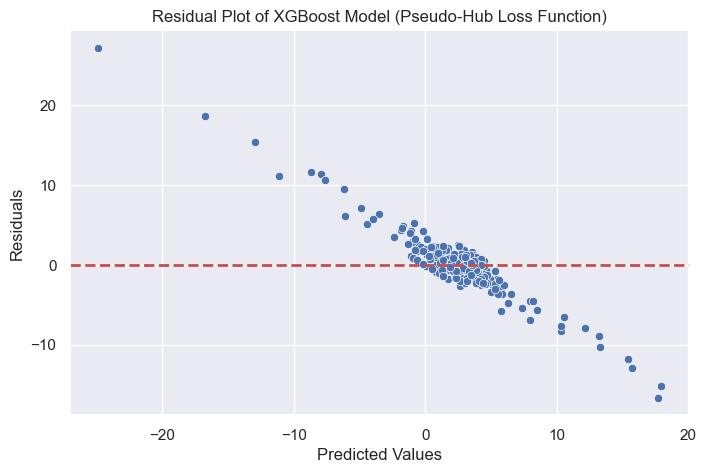

In [51]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) 
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot of XGBoost Model (Pseudo-Hub Loss Function)")
plt.show()

#### Quantile Error Loss Function

In [52]:
import xgboost as xgb

xgb =  xgb.XGBRegressor(objective="reg:quantileerror")

param_grid = {'quantile_alpha':[0.4, 0.5, 0.6, 0.7],
              'max_depth': [None, 3, 5, 7],
              "n_estimators":[100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters that minimizes MAE:", best_params)

best_xgb_quantile_model = grid_search.best_estimator_

y_pred = best_xgb_quantile_model.predict(X_test)

xgb_quantile_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {xgb_quantile_mae}")

results_df = pd.DataFrame(grid_search.cv_results_)
results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].round(2).sort_values(by='rank_test_score')

Best parameters that minimizes MAE: {'max_depth': 3, 'n_estimators': 100, 'quantile_alpha': 0.5}
Test MAE: 0.6936506185797905


,params,mean_test_score,std_test_score,rank_test_score
13,"{'max_depth': 3, 'n_estimators': 100, 'quantil...",-0.72,0.03,1
37,"{'max_depth': 7, 'n_estimators': 100, 'quantil...",-0.72,0.02,2
1,"{'max_depth': None, 'n_estimators': 100, 'quan...",-0.72,0.02,3
41,"{'max_depth': 7, 'n_estimators': 200, 'quantil...",-0.72,0.02,4
9,"{'max_depth': None, 'n_estimators': 300, 'quan...",-0.72,0.02,5
17,"{'max_depth': 3, 'n_estimators': 200, 'quantil...",-0.72,0.03,6
5,"{'max_depth': None, 'n_estimators': 200, 'quan...",-0.72,0.02,7
38,"{'max_depth': 7, 'n_estimators': 100, 'quantil...",-0.73,0.03,8
21,"{'max_depth': 3, 'n_estimators': 300, 'quantil...",-0.73,0.03,9
45,"{'max_depth': 7, 'n_estimators': 300, 'quantil...",-0.73,0.02,10


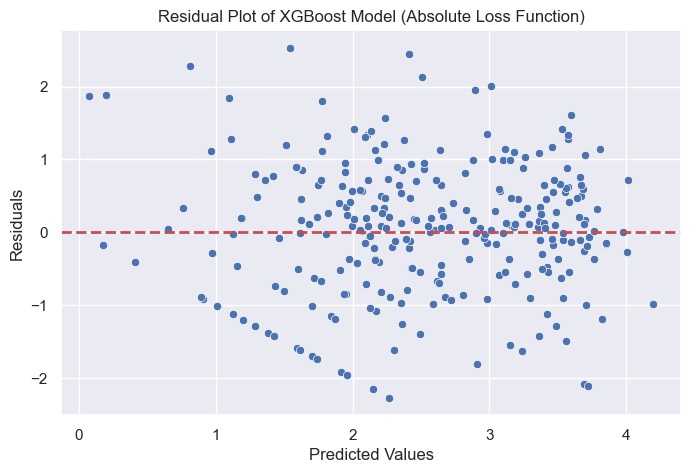

In [53]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) 
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot of XGBoost Model (Absolute Loss Function)")
plt.show()

#### Tweedie Loss Function

In [54]:
import xgboost as xgb

xgb = xgb.XGBRegressor(objective="reg:tweedie", tweedie_variance_power=1.99, learning_rate=0.01)  # Between 1 (Poisson) and 2 (Gamma)
xgb_model = xgb.fit(X_train, y_train)

# Training MAE
y_pred_train = xgb_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
print(f'Training MAE: {train_mae:.3f}')

# Test MAE
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {mae:.3f}')

Training MAE: 0.562
Test MAE: 0.766


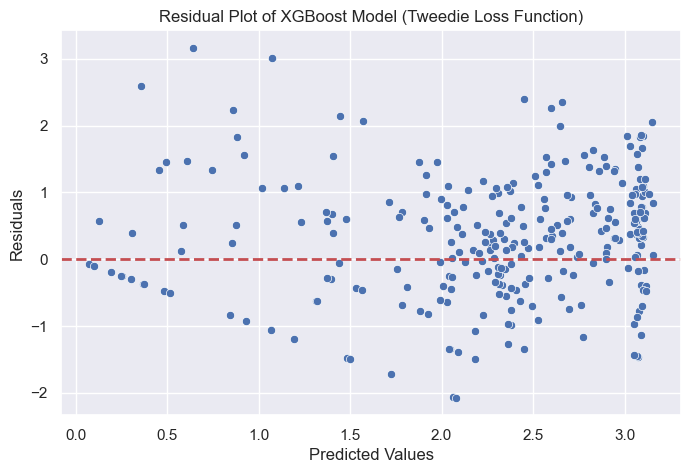

In [55]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) 
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot of XGBoost Model (Tweedie Loss Function)")
plt.show()

In [56]:
import xgboost as xgb

xgb =  xgb.XGBRegressor(objective="reg:tweedie")

param_grid = {'tweedie_variance_power': [1.5, 1.7, 1.9, 1.95, 1.99],
              'max_depth': [None, 3, 5, 7],
              "n_estimators":[100, 200, 300],
              'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters that minimizes MAE:", best_params)

best_xgb_tweedie_model = grid_search.best_estimator_

y_pred = best_xgb_tweedie_model.predict(X_test)

xgb_tweedie_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {xgb_tweedie_mae}")

results_df = pd.DataFrame(grid_search.cv_results_)
results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].round(2).sort_values(by='rank_test_score')

Best parameters that minimizes MAE: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'tweedie_variance_power': 1.5}
Test MAE: 0.7010299992420388


,params,mean_test_score,std_test_score,rank_test_score
25,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-0.70,0.02,1
75,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",-0.70,0.02,2
26,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",-0.71,0.02,3
35,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",-0.71,0.02,4
40,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",-0.71,0.02,5
...,...,...,...,...
104,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-1.08,0.53,176
159,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",-1.42,1.15,177
134,"{'learning_rate': 0.2, 'max_depth': None, 'n_e...",NaN,NaN,178
164,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",NaN,NaN,178


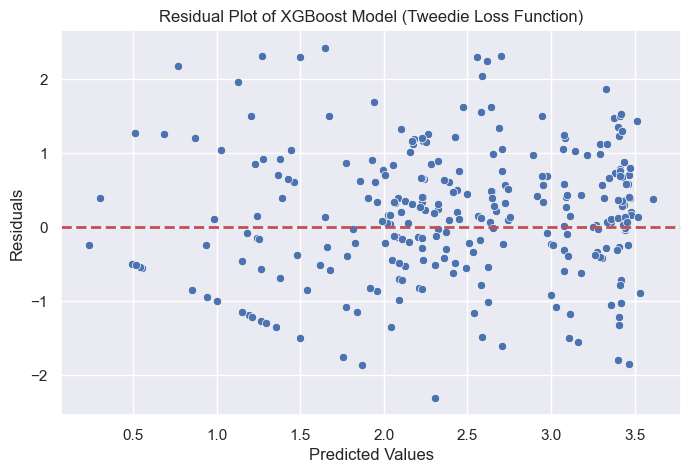

In [57]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) 
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot of XGBoost Model (Tweedie Loss Function)")
plt.show()

### Final Model

In [62]:
final_model = lin_reg.fit(X, y)
final_model

LinearRegression()

In [66]:
df_test = pd.read_csv('C:/Users/user/1/Downloads/Dengue Fever Project/dengue_features_test.csv')

for i in df_test.columns[4:]:  
    df_test[i] = df_test[i].fillna(df_test[i].median())  
    
df_test['week_sin'] = np.sin(2 * np.pi * df_test['weekofyear'] / 53)
df_test['week_cos'] = np.cos(2 * np.pi * df_test['weekofyear'] / 53)

df_test_dummies = pd.get_dummies(df_test ,columns=['city'], drop_first=True)

y_test = df_test_dummies.drop(['year', 'week_start_date', 'weekofyear','station_avg_temp_c', 'station_diur_temp_rng_c', 'precipitation_amt_mm', 'reanalysis_max_air_temp_k', 'reanalysis_tdtr_k', 'reanalysis_air_temp_k', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k'], axis=1)
results = final_model.predict(y_test)

columns = ["city", "year", "weekofyear"] 
extra_info = df_test[columns]
results_df = pd.DataFrame({"total_cases": results}) 

final_results = pd.concat([extra_info.reset_index(drop=True), results_df], axis=1)

final_results['total_cases'] = final_results['total_cases'].apply(lambda x: round(x))
final_results.to_csv("predictions.csv", index=False)

## Submissions
----

In [57]:
df_test = pd.read_csv('C:/Users/user/1/Downloads/Dengue Fever Project/dengue_features_test.csv')
df_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [58]:
for i in df_test.columns[4:]:  
    df_test[i] = df_test[i].fillna(df_test[i].median())  
df_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [59]:
df_test['week_sin'] = np.sin(2 * np.pi * df_test['weekofyear'] / 53)
df_test['week_cos'] = np.cos(2 * np.pi * df_test['weekofyear'] / 53)

In [60]:
df_test_dummies = pd.get_dummies(df_test ,columns=['city'], drop_first=False)
df_test_dummies.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_sin,week_cos,city_iq,city_sj
0,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,0.845596,-0.533823,0,1
1,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,0.776524,-0.630088,0,1
2,2008,20,2008-05-13,-0.0015,0.088700,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,0.696551,-0.717507,0,1
3,2008,21,2008-05-20,0.1101,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,0.606800,-0.794854,0,1
4,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,0.508531,-0.861044,0,1


In [61]:
y_test = df_test_dummies.drop(['year', 'weekofyear', 'week_start_date'], axis=1)
results = final_model.predict(y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- city_iq
- precipitation_amt_mm
- reanalysis_air_temp_k
- reanalysis_dew_point_temp_k
- reanalysis_max_air_temp_k
- ...


In [ ]:
columns = ["city", "year", "weekofyear"] 
extra_info = df_test[columns]
results_df = pd.DataFrame({"total_cases": results}) 

In [ ]:
final_results = pd.concat([extra_info.reset_index(drop=True), results_df], axis=1)
print(final_results.head())

In [ ]:
final_results['total_cases'] = final_results['total_cases'].apply(lambda x: np.expm1(x))
final_results['total_cases'] = final_results['total_cases'].apply(lambda x: round(x))
final_results.to_csv("predictions.csv", index=False)

In [56]:
#### Without Target Transformation

# Linear Regression: 27.40
# Random Forests: 25.17 (n_estimators=300, max_depth=5)
# Gradient Boosting with Huber LF: 27.36
# Gradient Boosting with Absolute Error LF: 27.45
# XGBoost with PseudoHub LF: 27.42
# XGBoost with Absolute Error LF: 27.12
# XGBoost with Quantile Error LF: 27.14
# XGBoost with Tweedie LF: 26.29

#### With Target Transformation (log1p)

# Random Forests: 26.62 
# Gradient Boosting with Absolute Error LF: 27.51
# Gradient Boosting with Huber LF: 26.92
# XGBoost with PseudoHub LF: 
# XGBoost with Absolute Error LF: 27.84
# XGBoost with Quantile Error LF: 27.55
# XGBoost with Tweedie LF: 27.53

#### With Target Transformation (sqrt)